<a href="https://colab.research.google.com/github/Aleena24/ML_Lab/blob/main/lab7_2348503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/employee_data.csv')
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


EDA exploratory data analysis

In [ ]:
#Basic information
df.info()

#Describe the data
df.describe()

# Check for missing values
is_null = df.isnull()

# Drop missing values from the DataFrame
df = df.dropna()

#Find the duplicates
df.duplicated().sum()

print(df)

In [55]:
#handling the null values
df['filed_complaint'].fillna(0,inplace=True)
df['last_evaluation'].fillna(df['last_evaluation'].mean(),inplace=True)
df['recently_promoted'].fillna(0,inplace=True)
df['satisfaction'].fillna(df['satisfaction'].mode()[0],inplace=True)
data=df.dropna()

encoding to numerical data

In [56]:
#Assigning nominal data numeric values
from sklearn.preprocessing import LabelEncoder
for col in ['department','salary','status']:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
data.head()


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
512,220,6,1.0,0.940621,4,1.0,2,0.647586,0,3.0
971,263,0,1.0,0.611552,4,1.0,2,0.739768,0,2.0
1032,132,0,1.0,0.358521,5,1.0,1,0.509522,0,6.0
1150,245,6,1.0,0.908024,2,1.0,2,0.689759,0,2.0
1301,160,6,1.0,0.495390,2,1.0,1,0.513384,1,3.0


Data Exploration and Visualization:

distribution of employee tenure using a histogram.

Text(0, 0.5, 'No. of Employees')

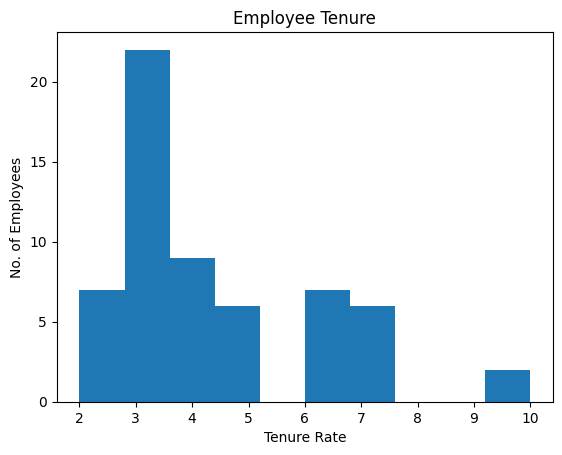

In [ ]:
df['tenure'].plot(kind='hist')
plt.title('Employee Tenure')
plt.xlabel('Tenure Rate')
plt.ylabel('No. of Employees')

Boxplot representation

<Axes: xlabel='status', ylabel='satisfaction'>

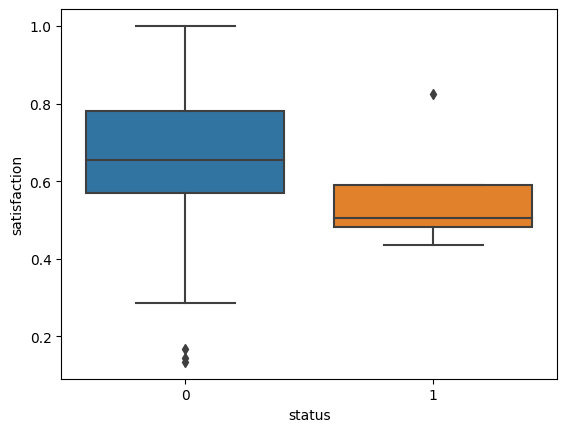

In [60]:
#boxplot for satisfaction score based on status
sns.boxplot(y=data['satisfaction'],x=data['status'])

pie chart to show the distribution of attrition

<Axes: ylabel='status'>

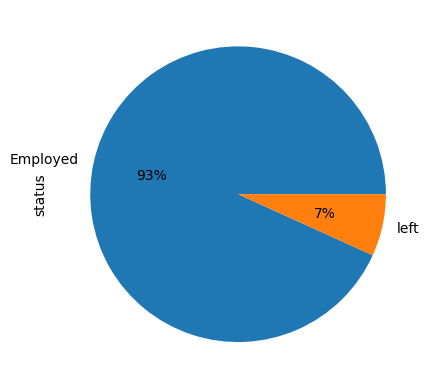

In [59]:
#pie chart showing employed and left ratio
data['status'].value_counts().plot(kind="pie",labels=["Employed","left"],autopct='%1.0f%%')


scatter plot

<Axes: xlabel='satisfaction', ylabel='last_evaluation'>

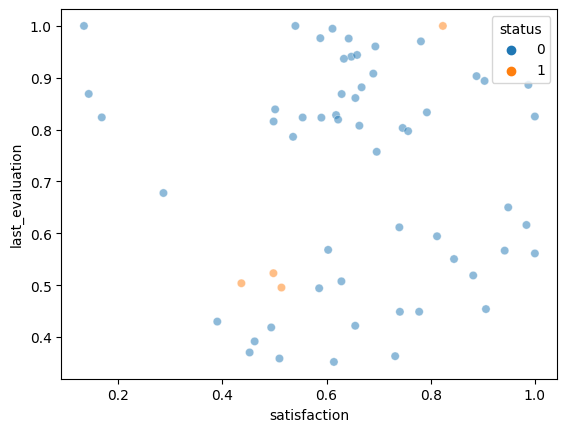

In [61]:
#scatter plot showing satisfaction and last evaluation based on status
sns.scatterplot(x=data['satisfaction'],y=data['last_evaluation'],hue=data['status'],alpha=0.5)


Decision tree

In [62]:
#assigning dependent and independent features
X=data.drop(columns='status',axis=1)
y=data['status']

In [63]:
# Import Library for splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2, test_size = 0.2)


Gini impurity and entropy
used to measure quality of split in decision tree
identify best split
accuracy,reduce the overfitting, identify the most important features ,relationships between features .

In [64]:
# Creating Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train,y_train)
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [65]:
# Predict Accuracy Score
from sklearn.metrics import accuracy_score
y_pred = clf_gini.predict(X_test)
print("Test data accuracy using gini impurity:",accuracy_score(y_true = y_test, y_pred=y_pred))
y_pred = clf_entropy.predict(X_test)
print("Test data accuracy using entropy:",accuracy_score(y_true = y_test, y_pred=y_pred))


Test data accuracy using gini impurity: 1.0
Test data accuracy using entropy: 0.9166666666666666


Model Evaluation

<BarContainer object of 9 artists>

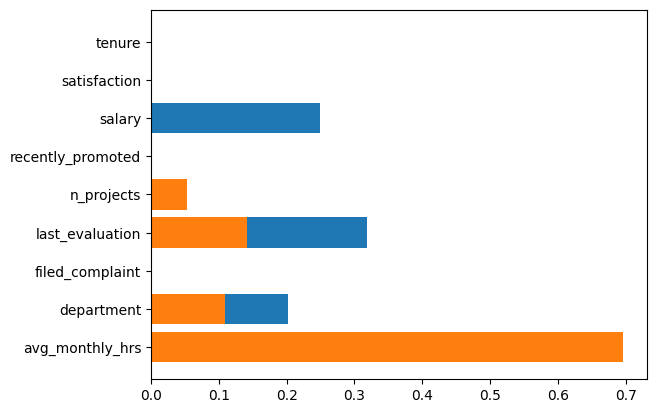

In [67]:
#finding most important features under entropy and gini
plt.barh(X.columns,clf_entropy.feature_importances_)
plt.barh(X.columns,clf_gini.feature_importances_)

In [68]:
#tree depth of entropy and gini
print("entropy tree depth:"+str(clf_entropy.get_depth()))
print("gini tree depth:"+str(clf_gini.get_depth()))

entropy tree depth:4
gini tree depth:4


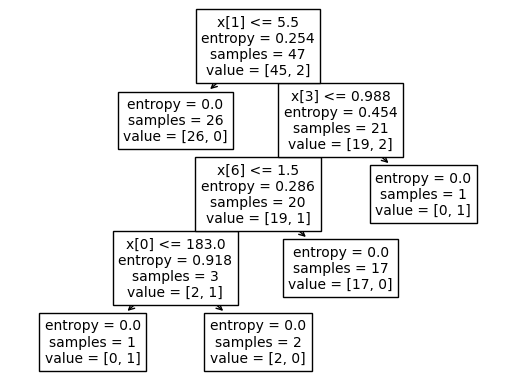

In [69]:
#plotting the tree under entropy
from sklearn import tree
tree.plot_tree(clf_entropy)
plt.show()

In [70]:
#prunning using max leaf nodes,min sample leaf and max depth
X=data.drop(columns=['status','salary','recently_promoted','filed_complaint','department'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2, test_size = 0.2)
clf = DecisionTreeClassifier(max_leaf_nodes=20,min_samples_leaf=2,max_depth=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred),clf.get_depth())


Test data accuracy: 0.8333333333333334 3


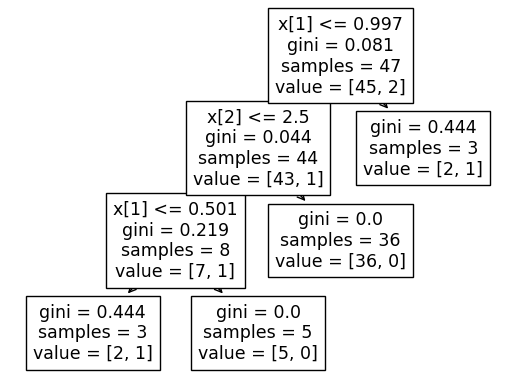

In [71]:
#plotting pruned tree
tree.plot_tree(clf)
plt.show()

In [72]:
#finding the precision,recall and f! score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.00      0.00      0.00         2

    accuracy                           0.83        12
   macro avg       0.42      0.50      0.45        12
weighted avg       0.69      0.83      0.76        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
#prunning on gini and entropy and finding accuracy
clf_gini = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=20,min_samples_leaf=2,max_depth=5)
clf_gini.fit(X_train,y_train)
clf_entropy = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=20,min_samples_leaf=2,max_depth=5)
clf_entropy.fit(X_train,y_train)
y_pred = clf_gini.predict(X_test)
print("Test data accuracy using gini impurity:",accuracy_score(y_true = y_test, y_pred=y_pred))
y_pred1 = clf_entropy.predict(X_test)
print("Test data accuracy using entropy:",accuracy_score(y_true = y_test, y_pred=y_pred1))


Test data accuracy using gini impurity: 0.8333333333333334
Test data accuracy using entropy: 0.8333333333333334


In [74]:
#confusion matrix under gini
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[10,  0],
       [ 2,  0]])

<BarContainer object of 5 artists>

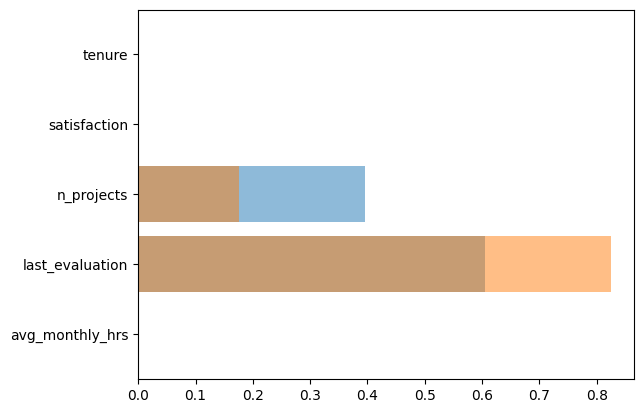

In [75]:
#feature importance under gini and entropy post pruning
plt.barh(X.columns,clf_entropy.feature_importances_,alpha=0.5)
plt.barh(X.columns,clf_gini.feature_importances_,alpha=0.5)
